# Ridge and Lasso Regression: A Detailed Explanation

Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.

This lab on Ridge and Lasso Regression is a Python adaptation of concepts explained in "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. It aims to demonstrate Ridge and Lasso regression with Python using the sklearn package.

# Understanding Ridge and Lasso Regression

Linear regression predicts continuous values by finding the best-fit line for the given data. However, it can suffer from overfitting when there are many features or multicollinearity. Ridge and Lasso regression introduce regularization to address these issues, penalizing large coefficient values to improve model generalization.

# Linear Regression

 **Objective**: Minimize the Residual Sum of Squares (RSS).

**Drawback**: No penalty for large coefficients, leading to overfitting in high-dimensional data.

#Ridge Regression

**Objective**: Minimize RSS with an additional penalty term:
                **Minimize RSS+λi=1∑n​βi2​​**



 * **λ** is the regularization parameter.

 * **​βi** are the model coefficients.

Effect: Shrinks coefficients towards zero but never eliminates them.

Key Point: Retains all features with reduced impact.

#Lasso Regression

**Objective**: Minimize RSS with an additional penalty term:
**Minimize RSS+λi=1∑n​∣βi​∣**

 * **λ** is the regularization parameter.

 * **βi** is the absolute value of the coefficients.

**Effect**: Shrinks some coefficients to exactly zero, effectively eliminating less important features.

**Key Point**: Performs feature selection in addition to regularization.

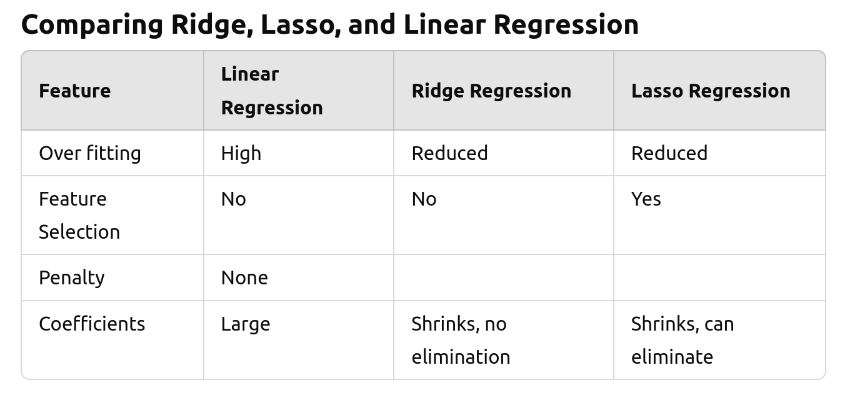

#Code Explanation

Below is the Python code for implementing Ridge and Lasso regression, explained step-by-step.

**Libraries and Dataset**

The code uses the Diabetes Dataset from sklearn, a small dataset often used for regression problems. Libraries like pandas, numpy, and matplotlib are used for data manipulation and visualization.



In [ ]:
# import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso , LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#Dataset Preparation

Load the dataset and split it into training and test sets. Create a DataFrame for easy viewing and manipulation.

In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
df=pd.DataFrame(X, columns=diabetes.feature_names)
df['target']=y

In [ ]:
# Display the first few rows of the dataset
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Linear Regression
Train a simple linear regression model and compute the R-squared score and Mean Squared Error (MSE)

In [ ]:
# LinearRegression Model
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
linear_score=linear_model.score(X_test, y_test)
linear_mse=mean_squared_error(y_test, linear_model.predict(X_test))
print(f"Linear Regression R-squared on test set: {linear_score:.2f}")
print(f"Linear Regression Mean Squared Error on test set: {linear_mse:.2f}")

Linear Regression R-squared on test set: 0.45
Linear Regression Mean Squared Error on test set: 2900.19


#Ridge Regression

Train Ridge regression models with and without cross-validation to find the optimal .

In [ ]:
# Ridge Regression with alpha=0 (OLS)
ridge_model = Ridge(alpha=0)
ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)
ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
print(f"Ridge Regression R-squared on test set: {ridge_score:.2f}")
print(f"Ridge Regression Mean Squared Error on test set: {ridge_mse:.2f}")

Ridge Regression R-squared on test set: 0.45
Ridge Regression Mean Squared Error on test set: 2900.19


In [ ]:
# Find the best alpha for Ridge Regression using RidgeCV
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 7), cv=5)
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.alpha_
print(f"Best alpha for Ridge Regression: {best_alpha_ridge:.3f}")


Best alpha for Ridge Regression: 0.100


In [ ]:
# Fit the final Ridge Regression model with the best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)
ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
print(f"Ridge Regression R-squared on test set: {ridge_score:.2f}")
print(f"Ridge Regression Mean Squared Error on test set: {ridge_mse:.2f}")

Ridge Regression R-squared on test set: 0.46
Ridge Regression Mean Squared Error on test set: 2856.49


#Lasso Regression

Train Lasso regression models with and without cross-validation to find the optimal

In [ ]:
# Test with lasso but alpha = 0 (ols)
lasso_alpha_0 = Lasso(alpha=0, max_iter=10000)
lasso_alpha_0.fit(X_train, y_train)
lasso_alpha_0_score = lasso_alpha_0.score(X_test, y_test)
lasso_alpha_0_mse = mean_squared_error(y_test, lasso_alpha_0.predict(X_test))
print(f"Lasso (alpha=0, OLS equivalent) R-squared on test set: {lasso_alpha_0_score:.2f}")
print(f"Lasso (alpha=0, OLS equivalent) Mean Squared Error on test set: {lasso_alpha_0_mse:.2f}")

Lasso (alpha=0, OLS equivalent) R-squared on test set: 0.45
Lasso (alpha=0, OLS equivalent) Mean Squared Error on test set: 2900.19


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [ ]:
# Find the best alpha for Lasso Regression using LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 7), cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.alpha_
print(f"Best alpha for Lasso Regression: {best_alpha_lasso:.3f}")



Best alpha for Lasso Regression: 0.100


In [ ]:
# Fit the final Lasso Regression model with the best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)
lasso_score = lasso_model.score(X_test, y_test)
lasso_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
print(f"Lasso Regression R-squared on test set: {lasso_score:.2f}")
print(f"Lasso Regression Mean Squared Error on test set: {lasso_mse:.2f}")

Lasso Regression R-squared on test set: 0.47
Lasso Regression Mean Squared Error on test set: 2798.19


#Coefficients Plot

Compare coefficients across Linear, Ridge, and Lasso models.

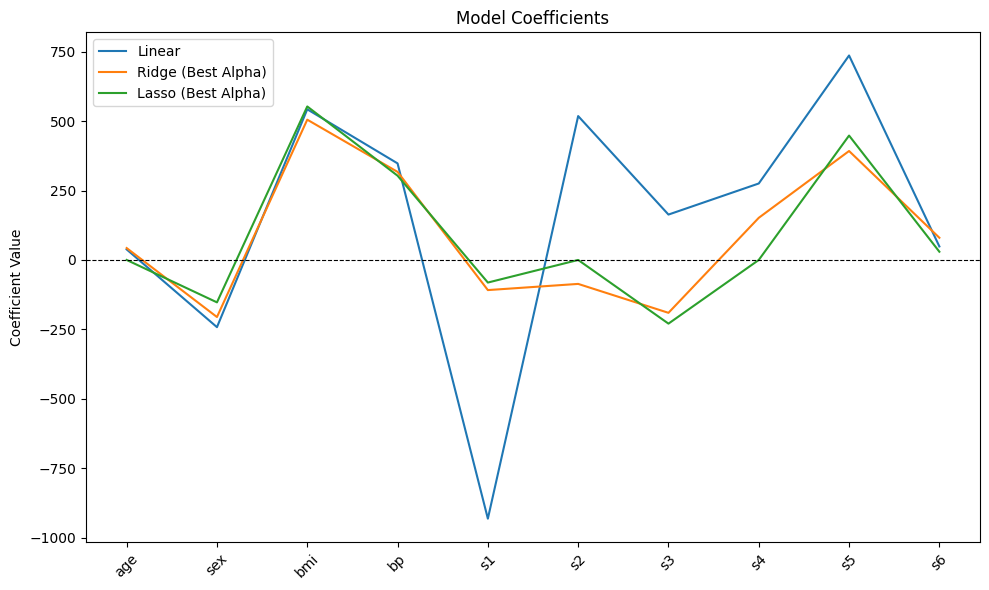

In [ ]:
# Visualization of Coefficients
models = ['Linear', 'Ridge (Best Alpha)', 'Lasso (Best Alpha)']
coefficients = [
    linear_model.coef_,
    ridge_model.coef_,
    lasso_model.coef_
]
plt.figure(figsize=(10, 6))
for i, coef in enumerate(coefficients):
    plt.plot(coef, label=models[i])

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(ticks=range(len(diabetes.feature_names)), labels=diabetes.feature_names, rotation=45)
plt.title('Model Coefficients')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()

#R-squared Scores Bar Chart

Compare R-squared scores across the three models.

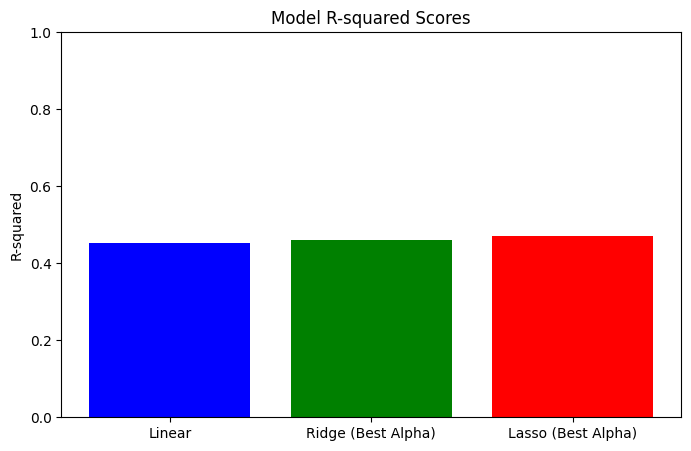

In [ ]:
# Visualization of R-squared Scores
scores = [linear_score, ridge_score, lasso_score]
plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['blue', 'green', 'red'])
plt.title('Model R-squared Scores')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.show()

#Key Takeaways

Linear Regression is simple but prone to overfitting in high-dimensional data.

Ridge Regression reduces overfitting but retains all features with smaller coefficients.

Lasso Regression reduces overfitting and performs feature selection by eliminating irrelevant features.

Visualizations help understand the impact of regularization on model performance and coefficients.

#ElasticNet Regression

ElasticNet combines the penalties of Ridge and Lasso regression:
Objective: Minimize RSS+λ1∑i=1n∣βi∣+λ2∑i=1nβi2

   * **λ1**​: Lasso penalty (absolute values of coefficients).
   * **λ2​**: Ridge penalty (squared values of coefficients).


* If your dataset has correlated features:

 * Ridge handles correlations better by distributing the penalty across features.
 * Lasso eliminates some features entirely.

* ElasticNet combines the strengths of both:

 * Performs feature selection like Lasso.
 * NRetains correlated features like Ridge.



   # Polynomial Regression

  * What is it?
      * It’s a linear regression model applied to polynomial features:
       * **y=β0+β1x+β2x2+β3x3+…**
       * Instead of fitting a straight line, it fits a curved line.

  * Why use it?
      * It captures non-linear relationships between features and the target * variable, which linear regression cannot handle.

   * When is it necessary?
        * If your data shows non-linear patterns that linear models (Ridge, Lasso) fail to capture.

 **if  none of the regression models fails to capture patterns then use neural networks.**